<a href="https://colab.research.google.com/github/joiakim/deep-learning-study/blob/main/Notebooks/linear_Regression_UDL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split

In [ ]:
import os

def set_seed(seed: int = 42):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)

    # Optional: ensure deterministic behavior
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

set_seed(42)

In [ ]:
#create linear data
inputs = [round(random.random(), 3) for _ in range(300)]
bias = [round(random.random(),3) for _ in range(1000)]
linear_data = lambda numbers: [2*x+3+random.choice(bias) for x in inputs]
output=linear_data(input)

In [ ]:
def normalize_list(lst):
    min_val = min(lst)
    max_val = max(lst)
    return [round((x - min_val) / (max_val - min_val),3) for x in lst]


normalized_output = normalize_list(output)

In [ ]:
#include  some variability to data
outlier_x1 = [round(random.uniform(0.0,0.6), 3) for _ in range(50)]
outlier_y1 = [round(random.uniform(0.2,0.6), 3) for _ in range(50)]
outlier_x2 = [round(random.uniform(0.4,1.0), 3) for _ in range(50)]
outlier_y2 = [round(random.uniform(0.5,0.8), 3) for _ in range(50)]

In [ ]:
data = pd.DataFrame({'inputs': inputs+outlier_x1+outlier_x2, 'targets': normalized_output+outlier_y1+outlier_y2})

In [ ]:
data.shape

(400, 2)

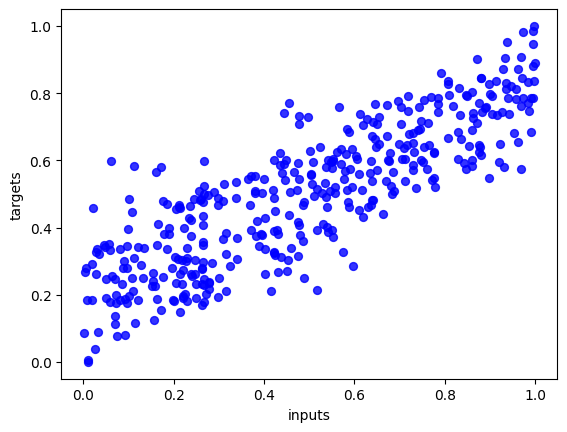

In [ ]:
data.plot(kind='scatter', x='inputs', y='targets', s=32, alpha=.8, color='blue')
plt.show()

#### can an unactivated linear layer capture linear relationship?


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(data.inputs, data.targets, test_size=0.2, random_state=set_seed())

X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
X_val.reset_index(drop=True, inplace=True)
y_val.reset_index(drop=True, inplace=True)

In [ ]:
# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32).unsqueeze(1)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_val = torch.tensor(X_val, dtype=torch.float32).unsqueeze(1)
y_val = torch.tensor(y_val, dtype=torch.float32)

# Create DataLoaders
train_data = TensorDataset(X_train, y_train)
val_data = TensorDataset(X_val, y_val)

train_loader = DataLoader(train_data, batch_size=8, shuffle=True)
val_loader = DataLoader(val_data, batch_size=8, shuffle=False)

In [ ]:
import torch.nn as nn

class linearregresor(nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Linear(1,1)

        )
    def forward(self, x):
        return self.network(x)


model = linearregresor()
print(model)

linearregresor(
  (network): Sequential(
    (0): Linear(in_features=1, out_features=1, bias=True)
  )
)


In [ ]:
import torch.optim as optim
optimizer = optim.SGD(model.parameters(), lr=0.01)
loss_fn = nn.MSELoss()

In [ ]:
from sklearn.metrics import mean_squared_error

epochs = 5
for epoch in range(epochs):
    model.train()
    running_loss = 0.0

    for batch in train_loader:
        X_batch, y_batch = batch
        out = model(X_batch).squeeze()
        loss = loss_fn(out, y_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    avg_train_loss = running_loss / len(train_loader)

    # Validation
    model.eval()
    val_loss = 0.0
    all_preds = []
    all_inputs = []
    all_targets = []

    with torch.no_grad():
        for batch in val_loader:
            X_batch, y_batch = batch
            predictions = model(X_batch).squeeze()
            val_loss += loss_fn(predictions, y_batch).item()
            all_inputs.extend(X_batch.numpy())
            all_preds.extend(predictions.numpy())
            all_targets.extend(y_batch.numpy())

    avg_val_loss = val_loss / len(val_loader)
    rmse = np.sqrt(mean_squared_error(all_targets, all_preds))

    print(f"Epoch {epoch+1}/{epochs}")
    print(f"Training Loss: {avg_train_loss:.4f}")
    print(f"Validation Loss: {avg_val_loss:.4f}, RMSE: {rmse:.4f}")


Epoch 1/5
Training Loss: 0.2338
Validation Loss: 0.0709, RMSE: 0.2663
Epoch 2/5
Training Loss: 0.0422
Validation Loss: 0.0196, RMSE: 0.1400
Epoch 3/5
Training Loss: 0.0176
Validation Loss: 0.0145, RMSE: 0.1204
Epoch 4/5
Training Loss: 0.0143
Validation Loss: 0.0142, RMSE: 0.1190
Epoch 5/5
Training Loss: 0.0138
Validation Loss: 0.0142, RMSE: 0.1191


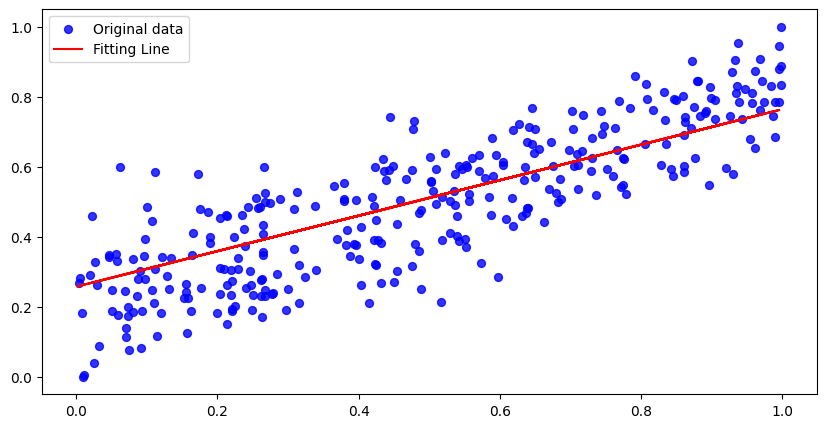

In [ ]:
fig = plt.figure(figsize=(10, 5))
plt.scatter(X_train.numpy(), y_train.numpy(), s=32, alpha=0.8, color='blue', label='Original data')
plt.plot(all_inputs, all_preds, label='Fitting Line', color='red')
plt.legend()
plt.show()